# Predicting heart disease using Machine Learning

This notebook is created with the help of various python libraries used in ML and Datascience to classify hwether or not someone has a heart disease based on their medical attributes.

we're going to take the following approach:
**1.problem definition
2.Data
3.Evaluatuion
4.Features
5.Modeling
6.Experimentation**

# 1.problem definition

> Given clinical parameters of a patient, can we predict whether or not they have heart disease

# 2.Data

>The original data came from a cleavland data uci data repository.

it has a format on kaagle a well:https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

# 3.Evaluation

>if we can reach 95% accuracy of whether or not someone has a heart disease,then we will pursue the project

# 4.Features

*this is where u will get diff info about each of your features in the dataset*

Data dictionary:

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease

trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern

chol - serum cholestoral in mg/dl

serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes;0 = no)

oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more

slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart

ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)

thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising

target - have disease or not (1=yes, 0=no) (= the predicted attribute)
Note: No personal identifiable information (PPI) can be found in the dataset.


## PREPARING OUR TOOLS, we will be using pandas , numpy , matplotlib,scikit-learn for this project

In [ ]:
#import all the tools we need

#regukar EDA(explatory data analysis) and data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

## Data exploration or EDA(Exploratory Data Analysis.)

 The goal here is to know more about the data and become the subject matter expert for this project

    1. What questions are u trying to ans?
    2. What kind of data do we have and how do we treat them?
    3. what is missing from the data and how to deal with it?
    4.what are the outlier and why should we care about them?
    5. How can we add and remove features to geet more out of your data.

<Axes: >

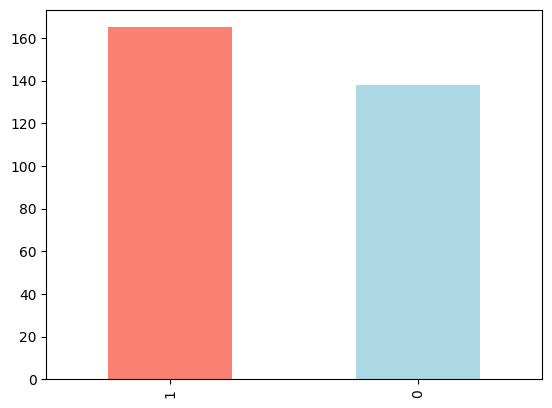

In [ ]:
# finding out how many of each class are there

df["target"].value_counts().plot(kind='bar',color=["salmon",'lightblue'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex attributes

In [ ]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
# compare target column with sex columns
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


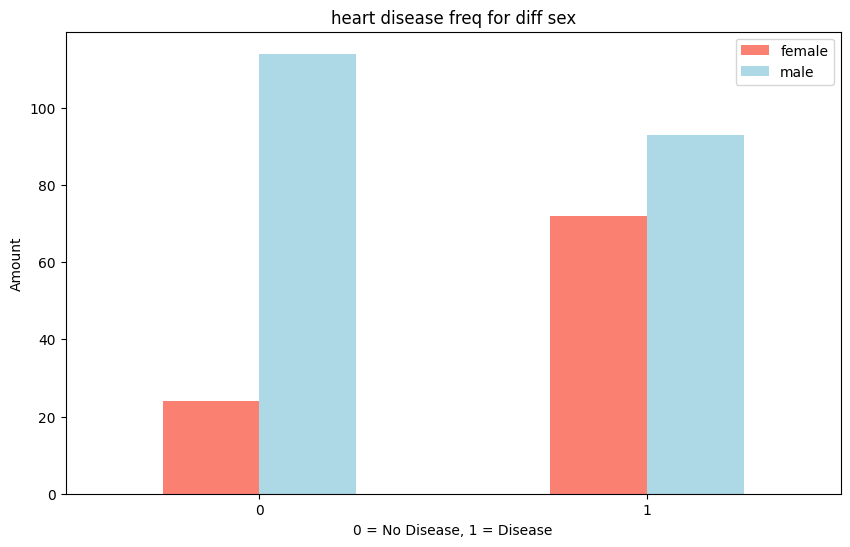

In [ ]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",figsize = (10,6), color= ['salmon','lightblue'])

plt.title("heart disease freq for diff sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["female","male"])
plt.xticks(rotation=0)
plt.show()

In [ ]:
pd.crosstab(df["age"],df["target"])

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


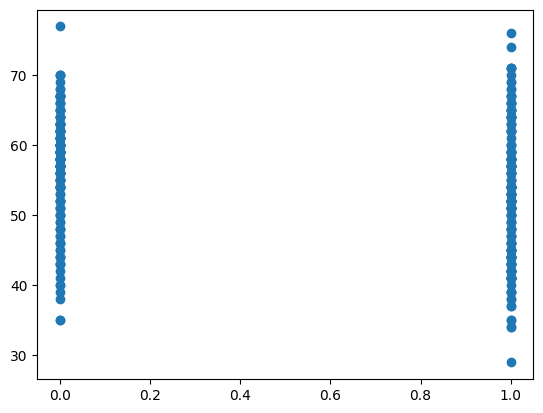

In [ ]:
plt.scatter(df["target"],df["age"]);

## Heart disease frequency vs age and thalach

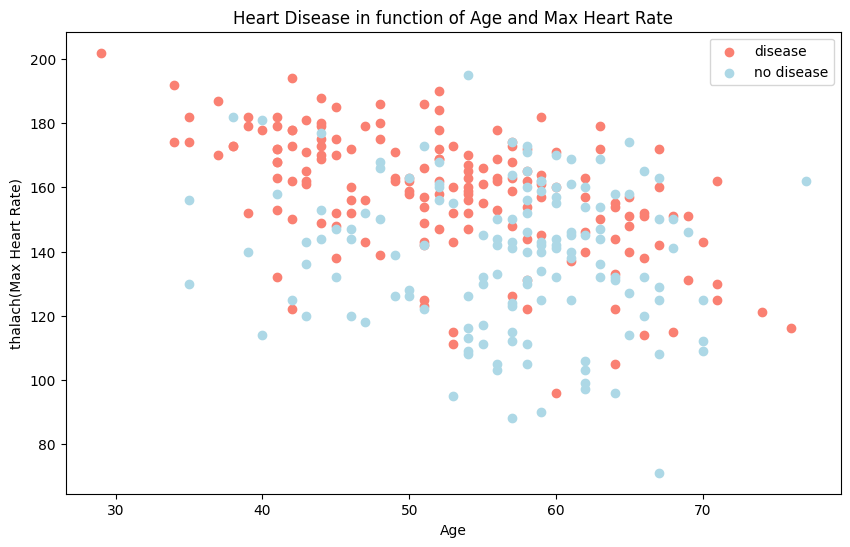

In [ ]:
# for the positive examples

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["age"][df["target"]==1], df["thalach"][df["target"]==1],c=["salmon"])

# for the neagtive example
ax.scatter(df["age"][df["target"]==0], df["thalach"][df["target"]==0],c=['lightblue'])

ax.set(title="Heart Disease in function of Age and Max Heart Rate",
      xlabel="Age",
      ylabel="thalach(Max Heart Rate)"
  )
plt.legend(["disease","no disease"]);

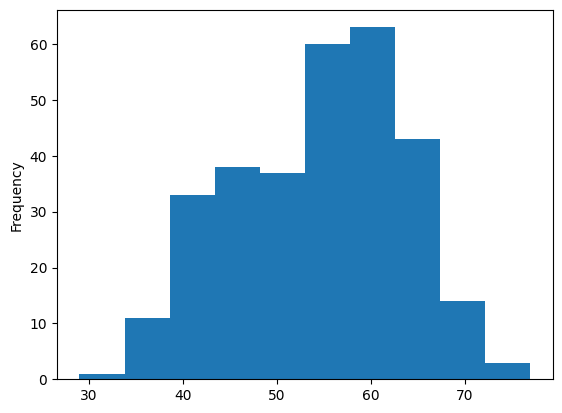

In [ ]:
# check the distribution of the age dataset
df["age"].plot.hist();

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


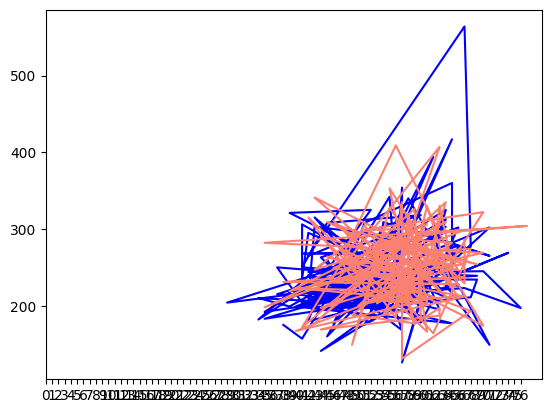

In [ ]:
# heart disease frequency w.r.t age and chol
fig, ax = plt.subplots()
ax.plot(df.age[df.target==1],df.chol[df.target==1],color='b')
ax.plot(df.age[df.target==0],df.chol[df.target==0],color='salmon')

plt.xticks(range(0,max(df.age)))
plt.show()

### Heart disease freqquency as peer function of age and chest pain

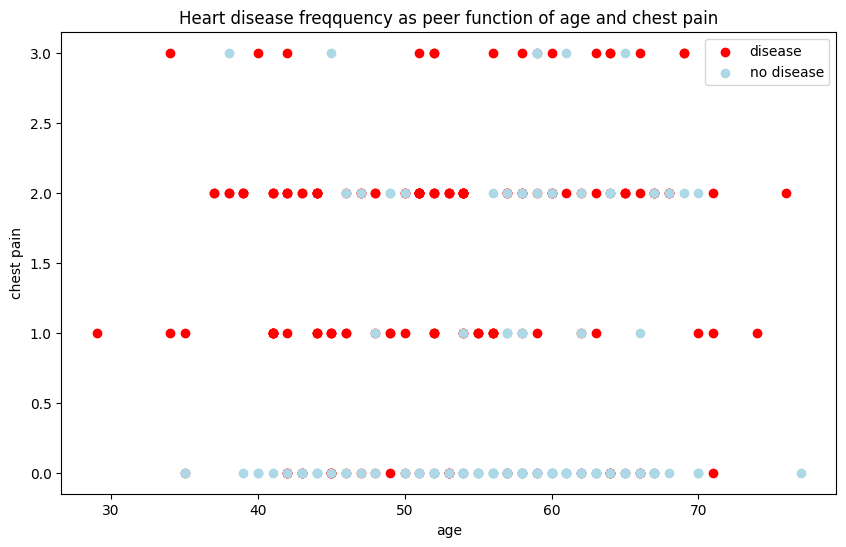

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['age'][df["target"]==1],df["cp"][df["target"]==1],c=["red"])
ax.scatter(df['age'][df["target"]==0],df["cp"][df["target"]==0],c=["lightblue"])
ax.set(title="Heart disease freqquency as peer function of age and chest pain",
      xlabel="age",
      ylabel = "chest pain")
plt.legend(["disease",'no disease'])
plt.show()

In [ ]:
# heart disease vs cp as a feature
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


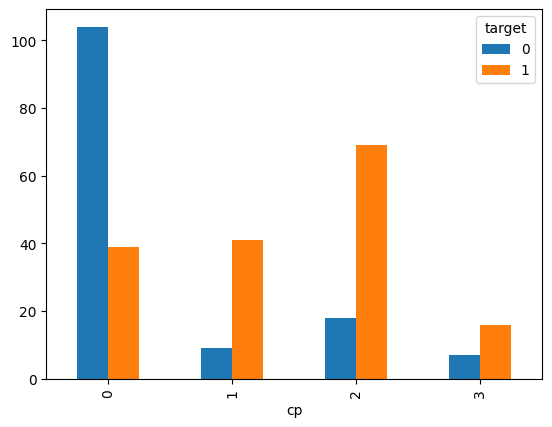

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind='bar');

### Making a corelation matrix

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


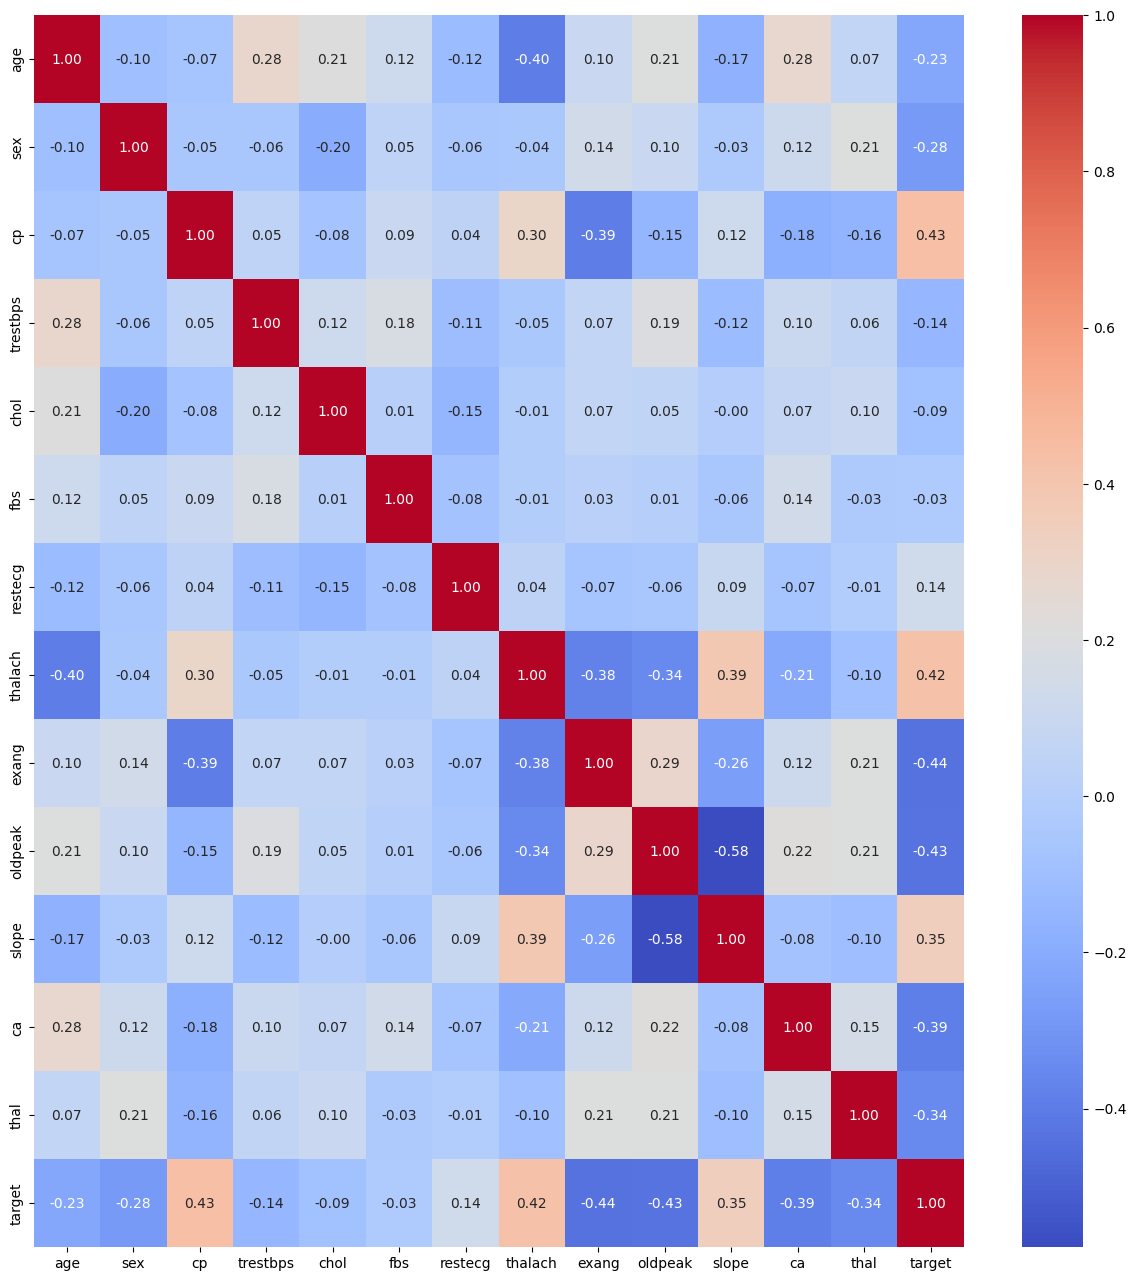

In [ ]:
fig,ax = plt.subplots(figsize=(15,16))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="coolwarm");

## 5. Modeling

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
x = df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [ ]:
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# split data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train,x_train.shape

(array([[43.,  0.,  2., ...,  1.,  0.,  2.],
        [66.,  0.,  2., ...,  1.,  1.,  2.],
        [58.,  1.,  2., ...,  2.,  0.,  2.],
        ...,
        [56.,  1.,  3., ...,  1.,  0.,  3.],
        [47.,  1.,  2., ...,  2.,  0.,  2.],
        [58.,  1.,  1., ...,  1.,  0.,  2.]]),
 (242, 13))

**we're going to use 4 different models:

1. Logistic regression
2. k-nearest neighbours
3. Random Forest classification
4. kernel SVM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
models = {"logistic regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier(),
          "support vector machine" : SVC()
         }

In [ ]:
def fit_and_score(models,x_train,y_train,x_test,y_test):

    np.random.seed(42)
    model_scores={}

    for name,model in models.items():
        model.fit(x_train,y_train)

        model_scores[name]=model.score(x_test,y_test)

    return model_scores

In [ ]:
model_score_dict=fit_and_score(models=models,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)

model_score_dict

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8524590163934426,
 'support vector machine': 0.6885245901639344}

### Model comparison

In [ ]:
model_compare = pd.DataFrame(model_score_dict,index=["accuracy"])
model_compare

,logistic regression,KNN,Random Forest,support vector machine
accuracy,0.852459,0.639344,0.852459,0.688525


<Axes: >

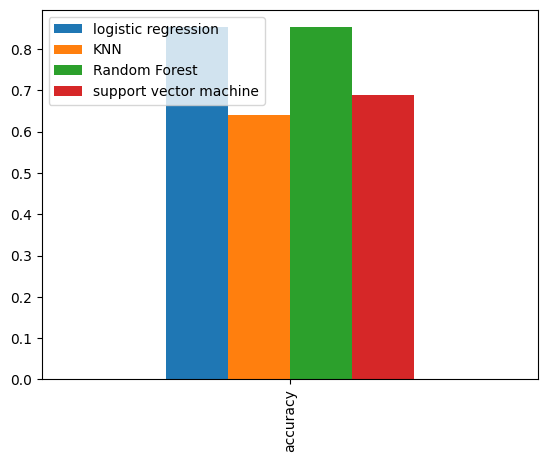

In [ ]:
model_compare.plot.bar()

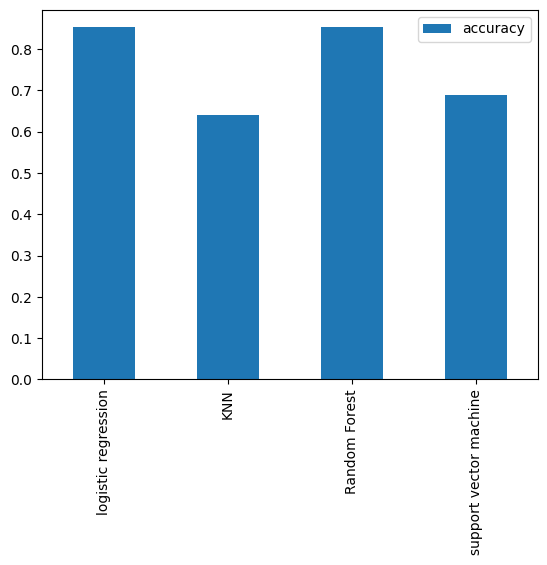

In [ ]:
model_compare.T.plot.bar();

Let's look at the following:

Hypyterparameter tuning

Feature importance

Confusion matrix

Cross-validation

Precision

Recall

F1 score

Classification report

ROC curve

Area under the curve (AUC)

## Tuning hyperparameters

In [ ]:
train_score=[]
test_score = []
knn = KNeighborsClassifier()

for i in range(1,21):
    knn.set_params(n_neighbors=i)

    knn.fit(x_train,y_train)

    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

In [ ]:
test_score

[0.5245901639344263,
 0.6065573770491803,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.7049180327868853,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344]

Max KNN model score on the data is 72.13%


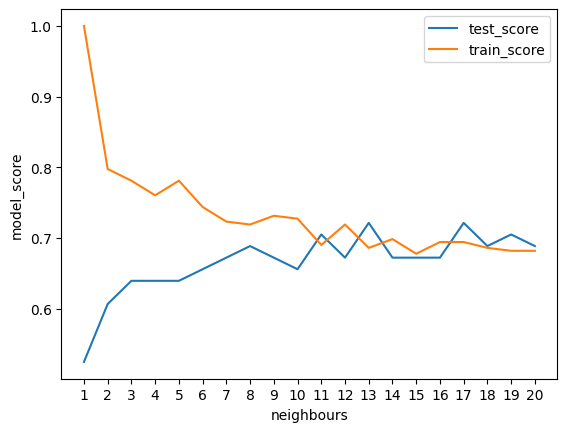

In [ ]:
print(f"Max KNN model score on the data is{max(test_score)*100: .2f}%")
fig,ax = plt.subplots()
ax.plot(range(1,21),test_score,label="test_score")
ax.plot(range(1,21),train_score,label="train_score")

ax.set(xlabel="neighbours",ylabel="model_score")
plt.legend()
plt.xticks(range(1,21))
plt.show()



# Hyperparameter tunnning by randomsearchCV

we're going to tune
* Logisticregression
* Randomforestclassifier
..using Randomsearchcv

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [44]:
# making a grid for logisticregression
log_reg_grid={ 'C': np.array([0.01, 0.1, 1.0, 10.0]),
    'penalty': np.array(['l1', 'l2']),
    'solver': np.array(['liblinear', 'lbfgs']),
    'class_weight': np.array([None, 'balanced'])}

    # making a grid for RandomForest classifier

rf_grid = {"n_estimators": np.arange(10,200,10),
               "max_depth":np.arange(5,14,2),
               "min_samples_split": np.arange(2,20,3),
               "min_samples_leaf":np.arange(2,8),
               "max_features":np.array(["sqrt"])}

In a logistic regression model, hyperparameters are parameters that are not learned during the training process but are set before training begins. Tuning these hyperparameters can significantly impact the performance and generalization of the model. Some of the key hyperparameters in a logistic regression model that can be tuned are:

1. **Regularization Strength (C or lambda):** Regularization is used to prevent overfitting and control the model complexity. The parameter C (or lambda) represents the inverse of the regularization strength. Higher values of C reduce the effect of regularization, allowing the model to fit the training data more closely, potentially leading to overfitting. On the other hand, lower values of C increase the regularization effect, making the model more robust and generalizable.

2. **Penalty Type (L1 or L2):** Logistic regression can use two types of regularization penalties: L1 and L2. L1 regularization adds the absolute values of the coefficients to the loss function, leading to sparse solutions (some coefficients become exactly zero). L2 regularization adds the squared values of the coefficients to the loss function, which generally keeps all coefficients non-zero but penalizes large coefficient values. Choosing between L1 and L2 regularization depends on the problem and the desired feature selection properties.

3. **Maximum Number of Iterations:** Logistic regression is typically optimized using iterative algorithms like gradient descent. The maximum number of iterations defines how many times the algorithm will update the model's parameters to minimize the loss function. If the algorithm doesn't converge within the specified number of iterations, you may need to adjust this hyperparameter.

4. **Solver:** The solver is the optimization algorithm used to find the optimal coefficients. Common choices include 'liblinear', 'lbfgs', 'newton-cg', 'sag', and 'saga'. The choice of solver may impact the training time and convergence behavior, so it's worth experimenting with different solvers.

5. **Class Weight:** In imbalanced datasets, you can assign different weights to classes to handle the class imbalance problem. By giving higher weight to the minority class, the model pays more attention to it during training.

6. **Tolerance:** The tolerance parameter defines the stopping criterion for the optimization algorithm. When the change in the loss function or coefficients falls below the tolerance value, the algorithm stops.

7. **Intercept Scaling:** Some implementations of logistic regression allow you to scale the intercept term. This can be useful when the features are not centered or standardized.

8. **Random State:** The random state is a seed value used to control the randomness in the model training. Setting a specific random state ensures reproducibility of results when you run the same experiment multiple times.

The exact set of hyperparameters available and their names may vary depending on the specific implementation or library you are using. When tuning hyperparameters, techniques like cross-validation or grid search can be employed to find the best combination of hyperparameters for your logistic regression model.

In [46]:
# making a function to evaluate the model
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score

def evaluation_metrics(y_true,y_pred):
  dict={"f1": f1_score(y_true,y_pred),
        "accuracy":accuracy_score(y_true,y_pred),
        "precision":precision_score(y_true,y_pred),
        "recall_score":recall_score(y_true,y_pred)}

  return dict

In [48]:
from sklearn.model_selection import GridSearchCV

gs_model = GridSearchCV(estimator=RandomForestClassifier(),param_grid=rf_grid,n_jobs=None,cv=5,verbose=2)

In [49]:
gs_model.fit(x_train,y_train)

Streaming output truncated to the last 5000 lines.
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=80; total time=   0.1s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=80; total time=   0.2s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.2s
[CV] END max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=90; total time=   0.

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 5,  7,  9, 11, 13]),
                         'max_features': array(['sqrt'], dtype='<U4'),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7]),
                         'min_samples_split': array([ 2,  5,  8, 11, 14, 17]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
             verbose=2)

In [52]:
gs_model.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 17,
 'n_estimators': 60}

In [54]:
y_pred = gs_model.predict(x_test)

In [55]:
evaluation_metrics(y_test,y_pred)

{'f1': 0.8493150684931507,
 'accuracy': 0.819672131147541,
 'precision': 0.7948717948717948,
 'recall_score': 0.9117647058823529}